## Import Packages and Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
from matplotlib import pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import pearsonr
from scipy.stats import ttest_rel
from sklearn.model_selection import train_test_split

## (P)ACE - Plan Phase
### Part 1 - Data
#### How were the observations in the dataset collected?

The source of the data is unknown and therefore confirming how the data was collected is impossible. For the sake of this analysis, we'll assume the data was collected in a manner that conforms to independence condition requirements

### Part 2 - Research Question
#### Project Scope

To analyze multiple variables to see which correlate most with Sleep Efficiency.

## P(A)CE - Analyze Phase
### Part 3 - EDA (Exploratory Data Analysis)
#### Investigate the Dataset

In [2]:
# Import the dataset
df = pd.read_csv('Sleep_Efficiency.csv')

##### Descriptive Statistics

In [3]:
# Summary Statistics
df.describe()

,ID,Age,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,432.000000,427.000000,438.000000,446.000000
mean,226.500000,40.285398,7.465708,0.788916,22.615044,52.823009,24.561947,1.641204,23.653396,1.173516,1.791480
std,130.625419,13.172250,0.866625,0.135237,3.525963,15.654235,15.313665,1.356762,30.202785,1.621377,1.428134
min,1.000000,9.000000,5.000000,0.500000,15.000000,18.000000,7.000000,0.000000,0.000000,0.000000,0.000000
25%,113.750000,29.000000,7.000000,0.697500,20.000000,48.250000,15.000000,1.000000,0.000000,0.000000,0.000000
50%,226.500000,40.000000,7.500000,0.820000,22.000000,58.000000,18.000000,1.000000,25.000000,0.000000,2.000000
75%,339.250000,52.000000,8.000000,0.900000,25.000000,63.000000,32.500000,3.000000,50.000000,2.000000,3.000000
max,452.000000,69.000000,10.000000,0.990000,30.000000,75.000000,63.000000,4.000000,200.000000,5.000000,5.000000


In [4]:
# Check column data types
df.dtypes

ID                          int64
Age                         int64
Gender                     object
Bedtime                    object
Wakeup time                object
Sleep duration            float64
Sleep efficiency          float64
REM sleep percentage        int64
Deep sleep percentage       int64
Light sleep percentage      int64
Awakenings                float64
Caffeine consumption      float64
Alcohol consumption       float64
Smoking status             object
Exercise frequency        float64
dtype: object

In [5]:
# Check for duplicates
df.shape
df.drop_duplicates().shape

(452, 15)

In [6]:
# Check for missing values
df_missing_values = df.isnull().sum()
print(df_missing_values)

ID                         0
Age                        0
Gender                     0
Bedtime                    0
Wakeup time                0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Awakenings                20
Caffeine consumption      25
Alcohol consumption       14
Smoking status             0
Exercise frequency         6
dtype: int64


In [7]:
# Remove, impute or acquire/enter missing data
df_filtered = df.dropna()
df_filtered.shape
df_filtered.isnull().sum()

ID                        0
Age                       0
Gender                    0
Bedtime                   0
Wakeup time               0
Sleep duration            0
Sleep efficiency          0
REM sleep percentage      0
Deep sleep percentage     0
Light sleep percentage    0
Awakenings                0
Caffeine consumption      0
Alcohol consumption       0
Smoking status            0
Exercise frequency        0
dtype: int64

##### Pairplot to visualize relationships between pairs of variables

In [8]:
#sns.pairplot(df)

#### Data Manipulation and Cleaning

In [9]:
# Rename columns for easier analysis

df_filtered = df_filtered.rename(
    columns={
        "Wakeup time": "Wakeup_time",
        "Sleep duration": "Sleep_duration",
        "Sleep efficiency": "Sleep_efficiency",
        "REM sleep percentage": "REM_sleep_percentage",
        "Deep sleep percentage": "Deep_sleep_percentage",
        "Light sleep percentage": "Light_sleep_percentage",
        "Exercise frequency": "Exercise_frequency",
        "Alcohol consumption": "Alcohol_consumption",
        "Caffeine consumption": "Caffeine_consumption",
           "Smoking status": "Smoking_status",
    }
)

df_filtered.reset_index
df_filtered.head()

,ID,Age,Gender,Bedtime,Wakeup_time,Sleep_duration,Sleep_efficiency,REM_sleep_percentage,Deep_sleep_percentage,Light_sleep_percentage,Awakenings,Caffeine_consumption,Alcohol_consumption,Smoking_status,Exercise_frequency
0,1,65,Female,2021-03-06 1:00,2021-03-06 7:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 2:00,2021-12-05 9:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30,2021-05-25 5:30,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 2:30,2021-11-03 8:30,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 1:00,2021-03-13 9:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [10]:
# Convert date columns

df_filtered["Bedtime"] = pd.to_datetime(df_filtered["Bedtime"])
df_filtered["Wakeup_time"] = pd.to_datetime(df_filtered["Wakeup_time"])
df_filtered.head()

,ID,Age,Gender,Bedtime,Wakeup_time,Sleep_duration,Sleep_efficiency,REM_sleep_percentage,Deep_sleep_percentage,Light_sleep_percentage,Awakenings,Caffeine_consumption,Alcohol_consumption,Smoking_status,Exercise_frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [11]:
# Extract the hour from the datetime columns

df_filtered["Bedtime_hour"] = df_filtered["Bedtime"].dt.hour
df_filtered["Wakeup_time_hour"] = df_filtered["Wakeup_time"].dt.hour
df_filtered.head()

,ID,Age,Gender,Bedtime,Wakeup_time,Sleep_duration,Sleep_efficiency,REM_sleep_percentage,Deep_sleep_percentage,Light_sleep_percentage,Awakenings,Caffeine_consumption,Alcohol_consumption,Smoking_status,Exercise_frequency,Bedtime_hour,Wakeup_time_hour
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0,1,7
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0,2,9
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0,21,5
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0,2,8
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0,1,9


In [12]:
# Keep relevant columns

columns_to_drop = ["Bedtime", "Wakeup_time"]
df_filtered = df_filtered.drop(columns_to_drop, axis=1)  # Drop specified columns
df_filtered.head()

,ID,Age,Gender,Sleep_duration,Sleep_efficiency,REM_sleep_percentage,Deep_sleep_percentage,Light_sleep_percentage,Awakenings,Caffeine_consumption,Alcohol_consumption,Smoking_status,Exercise_frequency,Bedtime_hour,Wakeup_time_hour
0,1,65,Female,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0,1,7
1,2,69,Male,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0,2,9
2,3,40,Female,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0,21,5
3,4,40,Female,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0,2,8
4,5,57,Male,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0,1,9


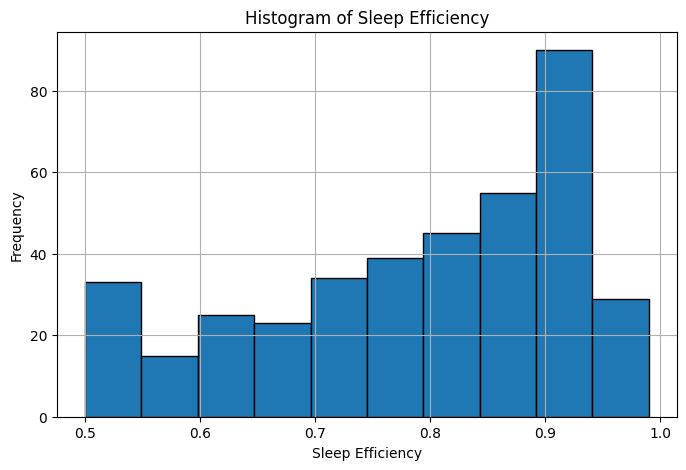

In [13]:
# Plot the Dependent Variable

plt.figure(figsize=(8, 5))
plt.hist(df_filtered["Sleep_efficiency"], bins=10, edgecolor="black")
plt.xlabel("Sleep Efficiency")
plt.ylabel("Frequency")
plt.title("Histogram of Sleep Efficiency")
plt.grid(True)

##### Initial Insights

The distribution of the dependent variable, Sleep Efficiency appears to be left skewed; therefore the normality assumption may not be met.

#### Check Statistical Test Conditions/Assumptions (If Applicable)

In [14]:
## Boxplots for Averages

In [15]:
## Histograms for Averages

In [16]:
## Normal Probability Plots

## PA(C)E - Construct Phase of the PACE Framework
### Part 4 - Modeling/Inference 

H0 (nothing going on): There is no correlation between "" and sleep efficiency.

HA (something going on): There is a correlation between "" physical activity"" and sleep efficiency.

#### Create a Hold-Out Sample (If Applicable)

In [17]:
# Subset X and y variables
df_filtered_X = df_filtered[
    [
        "Age",
        "Gender",
        "Sleep_duration",
        "REM_sleep_percentage",
        "Deep_sleep_percentage",
        "Light_sleep_percentage",
        "Awakenings",
        "Caffeine_consumption",
        "Alcohol_consumption",
        "Smoking_status",
        "Exercise_frequency",
        "Bedtime_hour",
        "Wakeup_time_hour",
    ]
]
df_filtered_y = df_filtered[["Sleep_efficiency"]]

# Import train-test-split function from sci-kit learn
from sklearn.model_selection import train_test_split

# Create training data sets and holdout (testing) data sets
X_train, X_test, y_train, y_test = train_test_split(
    df_filtered_X, df_filtered_y, test_size=0.3, random_state=42
)

#### Build and Fit The Model (If Applicable)

In [18]:
# Define the OLS formula.
ols_data = pd.concat([X_train, y_train], axis=1)

# Create an OLS model.
ols_formula = "Sleep_efficiency ~ Age + C(Gender) + Sleep_duration + REM_sleep_percentage + Deep_sleep_percentage + Light_sleep_percentage + Awakenings + Caffeine_consumption + Alcohol_consumption + C(Smoking_status) + Exercise_frequency + Bedtime_hour + Wakeup_time_hour"

# Fit the model.
OLS = ols(formula=ols_formula, data=ols_data)

# Save the results summary.
model = OLS.fit()

# Display the model results.
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Sleep_efficiency   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     87.12
Date:                Sat, 20 Jan 2024   Prob (F-statistic):           1.99e-83
Time:                        19:11:31   Log-Likelihood:                 380.63
No. Observations:                 271   AIC:                            -735.3
Df Residuals:                     258   BIC:                            -688.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    0.0002   1.19e-05     18.792      0.000       0.000       0.000
C(Gender)[T.Male]            0.0070      0.008      0.845      0.399      -0.009       0.023
C(Smoking_status)[T.Yes]    -0.0516      0.009     -5.979      0.000      -0.069      -0.035
Age                          0.0011      0.000      3.716      0.000       0.001       0.002
Sleep_duration               0.0107      0.006      1.733      0.084      -0.001       0.023
REM_sleep_percentage         0.0102      0.001     10.776      0.000       0.008       0.012
Deep_sleep_percentage        0.0088      0.000     19.589      0.000       0.008       0.010
Light_sleep_percentage       0.0035      0.001      6.928      0.000       0.002       0.004
Awakenings                  -0.0326      0.003    -10.824      0.000      -0.039      -0.027
Caffeine_consumption         0.0003      0.000      1.906      0.058   -8.69e-06       0.001
Alcohol_consumption         -0.0066      0.003     -2.504      0.013      -0.012      -0.001
Exercise_frequency           0.0075      0.003      2.497      0.013       0.002       0.013
Bedtime_hour                -0.0009      0.001     -1.269      0.206      -0.002       0.000
Wakeup_time_hour            -0.0068      0.004     -1.602      0.110      -0.015       0.002
==============================================================================
Omnibus:                        4.448   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.108   Jarque-Bera (JB):                4.543
Skew:                          -0.306   Prob(JB):                        0.103
Kurtosis:                       2.836   Cond. No.                     3.70e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.29e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### Run Statistical Tests (If Applicable)

#### Check Model Conditions/Assumptions Post Model Construction (If Applicable)

##### Linearity

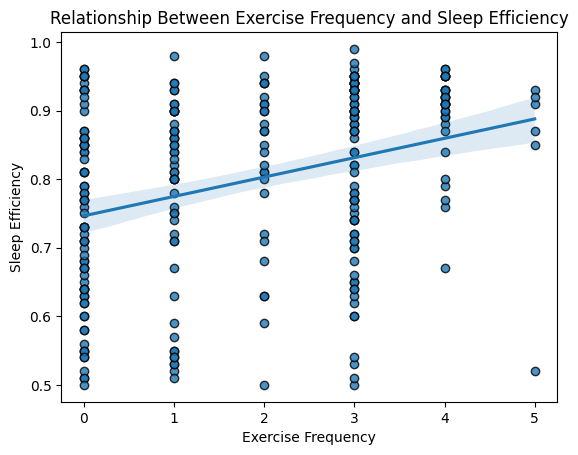

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the scatter plot with regression line
sns.regplot(x="Exercise_frequency", y="Sleep_efficiency", data=ols_data)

# Access the scatter plot object and set outlines
plt.gca().collections[0].set_edgecolor("black")  # Set outline color to black
plt.gca().collections[0].set_linewidth(1)  # Adjust outline width

# Optional: Add labels and title for clarity
plt.xlabel("Exercise Frequency")
plt.ylabel("Sleep Efficiency")
plt.title("Relationship Between Exercise Frequency and Sleep Efficiency")

plt.show()

There is considerable scatter around the regression line, meaning many data points deviate from the predicted values generated by the linear model. This suggests that exercise frequency alone cannot fully explain the variations in sleep efficiency.

The R-squared value of 0.069 is quite low, indicating that only a small proportion of the variance in sleep efficiency is explained by the linear model based on exercise frequency. This implies a weak overall relationship.

There might be non-linear patterns present in the data, especially towards the lower and upper ends of the exercise frequency range. The scatter plot hints at potential curvature or deviation from a straight line in these regions.

##### Independent Observations

Each observation (row) is independent of one another as each represents a different individual, therefore this condition is not violated.

##### Normality

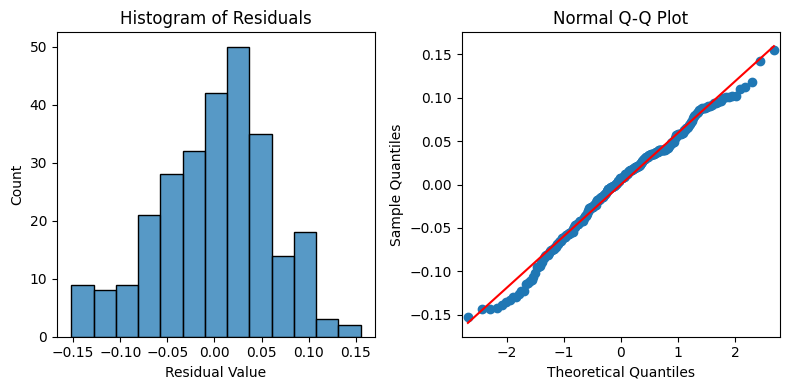

In [20]:
# Calculate the residuals.

# Create a histogram with the residuals .
residuals = model.resid
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
sns.histplot(residuals, ax=axes[0])
axes[0].set_xlabel("Residual Value")
axes[0].set_title("Histogram of Residuals")

# Create a Q-Q plot of the residuals.
sm.qqplot(model.resid, line="s", ax=axes[1])
axes[1].set_title("Normal Q-Q Plot")
plt.tight_layout()

These plots suggest that the residuals in this linear regression model are approximately normally distributed.

##### Homoscedasticity

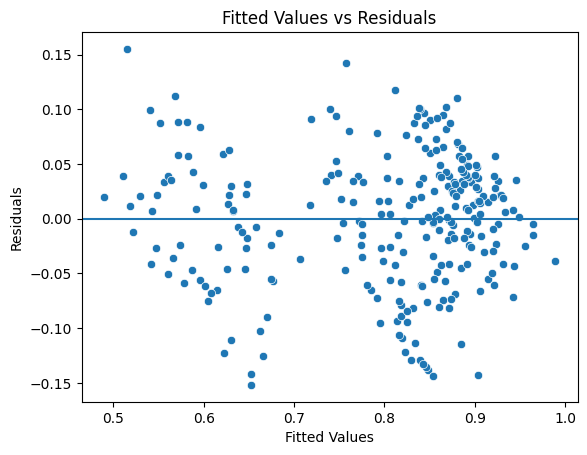

In [21]:
# Create a scatterplot with the fitted values from the model and the residuals.
fig = sns.scatterplot(x=model.fittedvalues, y=model.resid)
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")

# Set the title.
fig.set_title("Fitted Values vs Residuals")

# Add a line at y = 0 to visualize the variance of residuals above and below 0.
fig.axhline(0)

This plot suggests that the errors in the linear regression model are approximately normally distributed.

##### No Multicollinearity (If Applicable)

In [22]:
# Test multicollinearity of predictor variables with Variance Inflation Factor (VIF)

from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df_filtered[
    [
        "Age",
        "Sleep_duration",
        "REM_sleep_percentage",
        "Deep_sleep_percentage",
        "Light_sleep_percentage",
        "Awakenings",
        "Caffeine_consumption",
        "Alcohol_consumption",
        "Exercise_frequency",
        "Bedtime_hour",
        "Wakeup_time_hour",
    ]
]

vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif = zip(X, vif)
print(list(vif))

[('Age', 1.0915494035983657), ('Sleep_duration', 2.0208841335558865), ('REM_sleep_percentage', 33.948339386419896), ('Deep_sleep_percentage', 44.548230172803166), ('Light_sleep_percentage', 15.712297590501757), ('Awakenings', 1.2043805641957008), ('Caffeine_consumption', 1.088336093057496), ('Alcohol_consumption', 1.229391109024419), ('Exercise_frequency', 1.3072783948842732), ('Bedtime_hour', 3.813571794693203), ('Wakeup_time_hour', 5.0632440156513425)]


Featres with an VIF > 5 may have multicollinearity, which means they are highly correlated with each other and can inflate the standard errors of the regression coefficients. This can make it difficult to interpret the results of the model and can also lead to unstable coefficient estimates.

Consideration should be given to removing these features from the model or finding ways to reduce the multicollinearity between them.

### Part 5 - Prediction/Conclusion

In [23]:
model.summary()s

SyntaxError: invalid syntax (3167069918.py, line 1)

## PAC(E)- Execute Phase of the PACE Framework
### What Story does the Data Tell?